a) The average function $\bar{g}(x)$ denotes $\mathbf{E}_{D}[g^{(D)}(x)]$.

Since H consists of the functions in the form h(x) = ax + b, we choose the line that passes through the two data points 
$(x_{1}, x_{1}^2)$ and $(x_{2}, x_{1}^2)$.

The Equation of a line that passes through a point is $ y - y_{1} = m(x - x_{1})$
where m is the slope of the line. We can find the slope from two the points:

m = $(\frac{x_{2}^2-x_{1}^2}{x_{2}-x_{1}})$
$ = x_{1} + x_{2} $

$ \hat{y} - x_{1}^2  = (x_{1} + x_{2})(x - x_{1})$

$ \hat{y} = (x_{1} + x_{2})(x - x_{1}) + x_{1}^2 $

$         = x_{1}x - x_{1}^2 + x_{2}x - x_{2}x_{1} + x_{1}^2 $

$         = x_{1}x + x_{2}x - x_{2}x_{1} $

$         = (x_{1}+ x_{2})x - x_{2}x_{1} $

So based on that line, we can find $\bar{g}(x)$:

$ \bar{g}(x) = \mathbf{E}_{D}[ (x_{1}+ x_{2})x - x_{2}x_{1}] $

$= \mathbf{E}_{x_{1}, x_{2}}[(x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]*p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}] \,dx_{2}dx_{1}} $

$=0$





In [1]:
import matplotlib.pyplot as plt
import numpy as np


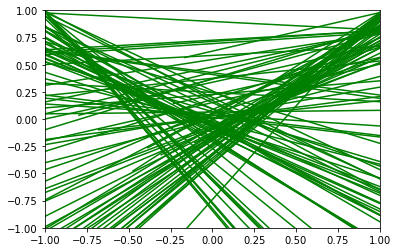

In [2]:
def abline(slope, intercept, label= ''):
    """Plot a line from slope and intercept
    from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-g', label = label)

def generate_data(num_datasets, seed_num):
    rng = np.random.default_rng(seed = seed_num)
    size = (num_datasets, 2)
    return rng.uniform(size=size) * rng.choice([-1,1], size)

plt_start = -1
plt_stop = 1
seed = np.random.randint(20)
num_datasets = 100
x = generate_data(num_datasets, seed)
y = np.square(x)
data = np.stack((x,y), axis=-1) #data is an array of data sets (size size.shape[0]) that look like [[x1,x1^2], [x2, x2^2]]

slopes = (y.T[1] - y.T[0]) / (x.T[1] - x.T[0])
intercepts = slopes * (-x.T[0]) + y.T[0]

plt.subplot()

#plt.plot(x.flatten(), y.flatten(), 'bo') #data points

plot_lines = np.vectorize(abline)
plot_lines(slopes, intercepts)

#plt.plot(np.arange(plt_start,plt_stop, 0.01), np.square(np.arange(plt_start,plt_stop, 0.01)), 'k') # f(x)

plt.xlim([plt_start, plt_stop]) #set x limits to [-1,-1]
plt.ylim([plt_start,plt_stop])
plt.show()



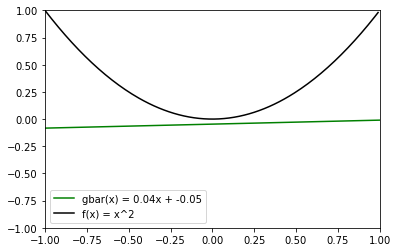

In [3]:
def stddev(point, slope, intercept):
    return np.std((slope*point) + intercept)

def samp_mean(point, slope, intercept):
    return np.mean((slope*point) + intercept)

fig, ax = plt.subplots()
plt.xlim([plt_start,plt_stop]) #set x limits to [-1,-1]
plt.ylim([plt_start,plt_stop])

#gbar(x)
gbar = f'gbar(x) = {round(slopes.mean(),2)}x + {round(intercepts.mean(),2)}'
abline(slopes.mean(), intercepts.mean(), label=gbar) 
ax.plot(np.arange(-1,1, 0.01), np.square(np.arange(-1,1, 0.01)), 'k', label="f(x) = x^2") #f(x)

ax.legend()

#--------------------------------------------------
gbarY = slopes.mean()*np.arange(plt_start, plt_stop, 0.01) + intercepts.mean()

test_data = generate_data(num_datasets, 42).flatten()[:100]

std = np.zeros(num_datasets*2)
mn = np.zeros(num_datasets*2)
for i, point in enumerate(test_data):   
    std[i] = stddev(point, slopes, intercepts)
    mn[i] = samp_mean(point, slopes, intercepts)

#up = mn + std
#down = mn - std
var = np.zeros(num_datasets*2)
for i, point in enumerate(test_data):   
    var[i] = np.sqrt(np.var((point*slopes) + intercepts ))

#print(var)
up = gbarY + var
down = gbarY - var


#plt.plot(np.arange(-1,1, 0.01), up, '-b')
#plt.plot(np.arange(-1,1, 0.01), down, '-g')
#mid = np.linspace(plt_start, plt_stop, 1)
#plt.fill_between(mid, up, down, alpha=0.2)



In [4]:
def eouts(x, slopes, intercepts):
    return np.square((x*slopes + intercepts) - np.square(x))

def bias(x, gslope, gintercept):
    return np.mean(np.square(((gslope*x) + gintercept) - np.square(x)))
def var(x, slopes, intercepts):
    return np.mean(np.square((slopes*x) - intercepts +  slopes.mean()*x - intercepts.mean()))

def othervar(x, slopes, intercepts):
    return np.var((slopes*x) + intercepts)

eout_ = eouts(test_data, slopes, intercepts)

bias_ =  bias(test_data, slopes.mean(), intercepts.mean())
var_ = var(test_data, slopes, intercepts)
var_2 = othervar(test_data, slopes, intercepts)
print("var 2", var_2)
print(gbar )
print("bias:", bias_)
print("var:", var_)
print("Eout, calulated:", eout_.mean())
print("Eout = bias + var_2:"  , bias_ + var_2)
print("Eout = bias + var:"  , bias_ + var_)

var 2 0.3871525002648913
gbar(x) = 0.04x + -0.05
bias: 0.20278590669344207
var: 0.44887252672704825
Eout, calulated: 0.4972972223934294
Eout = bias + var_2: 0.5899384069583333
Eout = bias + var: 0.6516584334204903


D) Computer analytically what $\mathbf{E}[E_{out}] $, bias, and var should be. 

Bias = $E_{x}[(E_{D}[g^{(D)}(x)]- f(x))^{2}]$

$ = E_{x}[(x^2)^2]$

$ = E_{x}[x^4]$

$= {\displaystyle\int_{x_{2} = -1}^{+1} [x^4]*p(x) \,dx} $

$p(x) = \frac{1}{2}$

$= {\displaystyle \frac{1}{2}\int_{-1}^{+1} [x^4]\,dx} $

$= {\displaystyle \frac{1}{2}\int_{-1}^{+1} [x^4]\,dx} $

$ = \frac{1}{2} * \frac{2}{5} $

$ = \frac{1}{5} $

___________________________________________________________________________________________________________________________

Var =  $\mathbf{E}_{x}[\mathbf{E}_{D}[(g^{(D)}(x) -\bar{g}(x))^2 ]] $

We computed above that $\bar{g}(x) = 0$ and that $g^{(D)}(x) = (x_{1}+ x_{2})x - x_{2}x_{1} $

$=\mathbf{E}_{x}[\mathbf{E}_{D}[((x_{1}+ x_{2})x - x_{2}x_{1})^2 ]] $

First we'll compute 
$\mathbf{E}_{D}[((x_{1}+ x_{2})x - x_{2}x_{1})^2 ]$:


$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]^2 *p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}]^2 \,dx_{2}dx_{1}} $

$ =\frac{1}{4}*\frac{4}{9} (1 + 6x^2)$ 

$ =\frac{1}{9} + \frac{2}{3}x^2$ 

Then, putting it back into $\mathbf{E}_{x}[]$:

var = $\mathbf{E}_{x}[\frac{1}{9} + \frac{2}{3}x^2]$

$= {\displaystyle \int_{x = -1}^{+1} [\frac{1}{9} + \frac{2}{3}x^2] *p(x) \,dx} $

$= {\displaystyle \frac{1}{2}\int_{x = -1}^{+1} [\frac{1}{9} + \frac{2}{3}x^2]\,dx} $

$= \frac{1}{2}*\frac{2}{3} $

$= \frac{1}{3} $




$\mathbf{E}[E_{out}] = $ bias + var

$ = \frac{1}{5} + \frac{1}{3}$

$ = \frac{8}{15}$ 